This project used a data released by Santander bank of Spain to determine how certain customer features influence 
the product they buy from the bank using chi square test for independence.The project also developed a model to investigate
how these factors can help to predict the likely product the customer will purchase using multinomial logistic regression. 
The data consisted of 13647309 entries with 48 columns from customers of the bank

In [ ]:
Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency

Load the datasets


In [2]:
df = pd.read_csv('\\Users\\cofos\\Downloads\\train_sample.csv')
df.head()

C:\Users\cofos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-03-28,1418933,N,ES,H,21,2015-07-28,0.0,8,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2016-01-28,1456556,N,ES,H,21,2015-09-22,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-07-28,536870,N,ES,V,55,2005-06-10,0.0,121,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-07-28,1164437,N,ES,V,24,2013-08-13,0.0,23,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2016-04-28,1539410,N,ES,V,56,2016-03-14,1.0,1,1.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta             

In [4]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,3.000000e+06,2.993857e+06,2.993857e+06,2993856.0,2.979294e+06,2.993857e+06,2.385195e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.996498e+06,2.996498e+06,3.000000e+06
mean,8.348361e+05,5.962743e-02,1.176729e+00,1.0,2.658404e+01,4.578552e-01,1.343037e+05,1.023333e-04,2.433333e-05,6.557817e-01,...,5.897000e-03,9.093667e-03,2.617000e-03,5.254733e-02,4.430600e-02,2.563600e-02,3.865000e-03,5.471520e-02,5.939700e-02,1.275767e-01
std,4.315100e+05,2.367953e-01,4.157912e+00,0.0,1.277960e+01,4.982207e-01,2.324808e+05,1.011548e-02,4.932824e-03,4.751128e-01,...,7.656518e-02,9.492615e-02,5.108965e-02,2.231281e-01,2.057741e-01,1.580468e-01,6.204888e-02,2.274235e-01,2.363663e-01,3.336179e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.526070e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.873924e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.319040e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018621e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.198993e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559863e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553686e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.describe(include = ['object'])

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,3000000,2993857,2993857,2993841,3000000,2993857,3000000,5399,2966872,2966872,2993857,2993857,389,2958763,2993857,2979294,2958048
unique,17,5,117,2,121,6749,259,223,13,4,2,2,2,161,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,12,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,204973,2991935,2979299,1631631,172262,12505,53150,177,1304480,1604745,2979299,2852217,383,891146,2986117,970365,1748770


In [6]:
#cleaning Data

age is object so we change it to numeric


In [7]:
#change datatype of age from object to numeric
df['age'] = pd.to_numeric(df['age'],errors='coerce')

Dealing with null rows, we are going to focus only on the columns we have interest in and drop all other columns.

In [8]:
df.nomprov.value_counts()

MADRID                    970365
BARCELONA                 278919
VALENCIA                  149561
SEVILLA                   133537
CORUÑA, A                  94179
MURCIA                     86630
MALAGA                     80671
ZARAGOZA                   75560
ALICANTE                   69050
CADIZ                      65116
PONTEVEDRA                 61524
ASTURIAS                   58439
VALLADOLID                 52338
PALMAS, LAS                51988
BADAJOZ                    42558
BIZKAIA                    40841
TOLEDO                     40424
GRANADA                    39115
SALAMANCA                  36071
CANTABRIA                  34420
CORDOBA                    31752
CACERES                    28479
BALEARS, ILLES             27492
HUELVA                     26951
CIUDAD REAL                26279
ALBACETE                   24904
CASTELLON                  22776
TARRAGONA                  21945
BURGOS                     21520
GIRONA                     19858
NAVARRA   

let fill all the rows with nan in this column with the common city Madrid

In [9]:
df.nomprov = df.nomprov.fillna("MADRID")

In [10]:
df.renta.value_counts()

451931.22    1245
463625.16     383
128318.52     342
181042.20     338
488798.49     286
             ... 
37127.40        1
100967.34       1
85820.58        1
142574.61       1
245315.46       1
Name: renta, Length: 508258, dtype: int64

In [11]:
df.groupby('nomprov')['renta'].aggregate([np.mean, np.median, np.min,np.max])

,mean,median,amin,amax
nomprov,,,,
ALAVA,131366.167500,130487.385,55271.07,253563.27
ALBACETE,83076.038705,78957.180,9180.00,764581.71
ALICANTE,88359.672500,67840.860,7791.09,17804048.10
ALMERIA,85590.372707,73567.860,8290.86,578348.88
ASTURIAS,101612.144021,87195.120,7618.77,4950059.34
AVILA,76196.027063,68561.610,10443.60,2768592.57
BADAJOZ,72226.781140,62370.630,7143.54,1103543.19
"BALEARS, ILLES",168998.381951,123780.915,6698.37,15711716.46
BARCELONA,164544.229262,131314.890,1471.23,5752268.34


we can fill in the null values with the median renta for each province.

In [12]:
df.loc[df.renta.isnull(), "renta"] = df.groupby('nomprov').renta.transform('median')

In [13]:
df.groupby('segmento')['renta'].aggregate([np.mean, np.median])

,mean,median
segmento,,
01 - TOP,166428.716619,136994.85
02 - PARTICULARES,135001.048463,107093.67
03 - UNIVERSITARIO,111241.080683,88972.83


we use this aggregation to fill nan rows in the segmento column

In [14]:
df.segmento = df[df.renta <= 96000].segmento.fillna("03 - UNIVERSITARIO")
df.segmento = df[df.renta <= 119500].segmento.fillna("02 - PARTICULARES")
df.segmento = df.segmento.fillna("01 - TOP")

In [15]:
df.sexo.value_counts()

V    1631631
H    1362210
Name: sexo, dtype: int64

we fill null with the most common values, in this case V(female)

In [16]:
df.sexo = df.sexo.fillna("V")

Drop columns which will not be use in the analysis

In [17]:
df1 = df.drop(['ind_aval_fin_ult1','ind_cder_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
                   'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_fond_fin_ult1',
                   'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
                   'ind_nom_pens_ult1','ind_recibo_ult1','fecha_dato','ind_empleado','pais_residencia','fecha_alta','ind_nuevo'],axis= 1,)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ncodpers               int64  
 1   sexo                   object 
 2   age                    float64
 3   antiguedad             object 
 4   indrel                 float64
 5   ult_fec_cli_1t         object 
 6   indrel_1mes            object 
 7   tiprel_1mes            object 
 8   indresi                object 
 9   indext                 object 
 10  conyuemp               object 
 11  canal_entrada          object 
 12  indfall                object 
 13  tipodom                float64
 14  cod_prov               float64
 15  nomprov                object 
 16  ind_actividad_cliente  float64
 17  renta                  float64
 18  segmento               object 
 19  ind_ahor_fin_ult1      int64  
 20  ind_cco_fin_ult1       int64  
 21  ind_ecue_fin_ult1      int64  
 22  ind_hip_fin_ult1  

In [19]:
df1.drop(['antiguedad','indrel','ult_fec_cli_1t','indrel_1mes','tiprel_1mes','indresi','indext','conyuemp','canal_entrada',
          'indfall','tipodom','cod_prov','ind_actividad_cliente'],axis = 1, inplace = True)

In [20]:
df1.columns

Index(['ncodpers', 'sexo', 'age', 'nomprov', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_cco_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1'],
      dtype='object')

In [21]:
df1.columns = ['ncodpers','sexo','age', 'nomprov','renta','segmento','saving_acc','current_acc','e-account','mortgage','pension_plan']


In [22]:
#check for nulls
df1.isna().sum()

ncodpers           0
sexo               0
age             6143
nomprov            0
renta              0
segmento           0
saving_acc         0
current_acc        0
e-account          0
mortgage           0
pension_plan       0
dtype: int64

In [23]:
df1['age'].fillna(df1['age'].median(), inplace = True)

In [24]:
df1.isna().sum()

ncodpers        0
sexo            0
age             0
nomprov         0
renta           0
segmento        0
saving_acc      0
current_acc     0
e-account       0
mortgage        0
pension_plan    0
dtype: int64

The data size is large therefore droping a few row will not have significant impact on our analysis, therefore rows with nan 
will be dropped

In [25]:
df1.shape

(3000000, 11)

In [26]:
#fraction of the data was used for the analysis

In [27]:
small_df = df1.sample(frac = 0.25, random_state = 2)
small_df.head()

,ncodpers,sexo,age,nomprov,renta,segmento,saving_acc,current_acc,e-account,mortgage,pension_plan
2408250,887120,H,29.0,MADRID,64869.57,03 - UNIVERSITARIO,0,0,0,0,0
2661732,45793,V,50.0,PONTEVEDRA,97640.88,02 - PARTICULARES,0,1,0,0,0
2608267,1035882,H,41.0,BIZKAIA,119315.31,02 - PARTICULARES,0,0,0,0,0
137201,990564,V,23.0,TARRAGONA,87984.60,03 - UNIVERSITARIO,0,1,0,0,0
2850241,312593,H,59.0,MADRID,581543.19,01 - TOP,0,1,0,0,0


In [28]:
small_df.shape

(750000, 11)

In [29]:
#Exploration/Visualization to see pattern

In [30]:
small_df.segmento.value_counts()

02 - PARTICULARES     297344
01 - TOP              293359
03 - UNIVERSITARIO    159297
Name: segmento, dtype: int64

Renaming the segmentao column

In [31]:
small_df['segmento'] = small_df['segmento'].replace(['02 - PARTICULARES'],'Individual')
small_df['segmento'] = small_df['segmento'].replace(['03 - UNIVERSITARIO'],'Graduates')
small_df['segmento'] = small_df['segmento'].replace(['01 - TOP'],'VIPs')

In [32]:
small_df['age'].aggregate([np.mean, np.median, np.min,np.max])

mean       40.166513
median     39.000000
amin        2.000000
amax      164.000000
Name: age, dtype: float64

In [33]:
small_df.loc[small_df['age'] < 18,"age"] = 18
small_df.loc[small_df['age'] > 90,"age"] = 90

In [34]:
#categorizing the age column

In [35]:
small_df.age.min()

18.0

In [36]:
conditions =[(small_df['age']<30),(small_df['age']>=30)&(small_df['age']< 40),
            (small_df['age']>=40)&(small_df['age']< 50),
            (small_df['age']>=50)&(small_df['age']<60), (small_df['age']>=60)]
values = ['20s','30s','40s','50s','60_and_above']
small_df['Age_category'] = np.select(conditions,values)

categorizing the renta column 

In [37]:
conditions =[(small_df['renta']<=31000),(small_df['renta']> 31000)&(small_df['renta']<42000),
            (small_df['renta']>42000)&(small_df['renta']<126000),
            (small_df['renta']>126000)&(small_df['renta']<188000),(small_df['renta']>188000)]
values = ['low_income','low_middle_income','middle_income','upper_middle_income','higher_income']
small_df['income_group'] = np.select(conditions,values)

In [38]:
small_df.columns

Index(['ncodpers', 'sexo', 'age', 'nomprov', 'renta', 'segmento', 'saving_acc',
       'current_acc', 'e-account', 'mortgage', 'pension_plan', 'Age_category',
       'income_group'],
      dtype='object')

In [39]:
df2= pd.melt(small_df, id_vars=['ncodpers','income_group','sexo','age','renta','segmento','Age_category','nomprov'],
                    var_name = 'product_type', value_name = 'product_count')

In [40]:
df2.head()

,ncodpers,income_group,sexo,age,renta,segmento,Age_category,nomprov,product_type,product_count
0,887120,middle_income,H,29.0,64869.57,Graduates,20s,MADRID,saving_acc,0
1,45793,middle_income,V,50.0,97640.88,Individual,50s,PONTEVEDRA,saving_acc,0
2,1035882,middle_income,H,41.0,119315.31,Individual,40s,BIZKAIA,saving_acc,0
3,990564,middle_income,V,23.0,87984.60,Graduates,20s,TARRAGONA,saving_acc,0
4,312593,higher_income,H,59.0,581543.19,VIPs,50s,MADRID,saving_acc,0


Text(0.5, 1.0, 'Age category Vs Product Count')

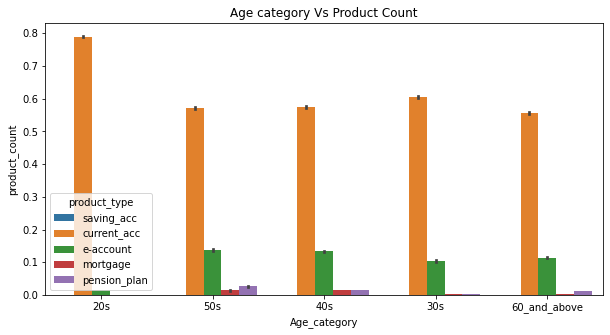

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Age_category', y = 'product_count',hue = 'product_type', data = df2)
plt.title('Age category Vs Product Count')


Text(0.5, 1.0, 'Gender Vs Product Count')

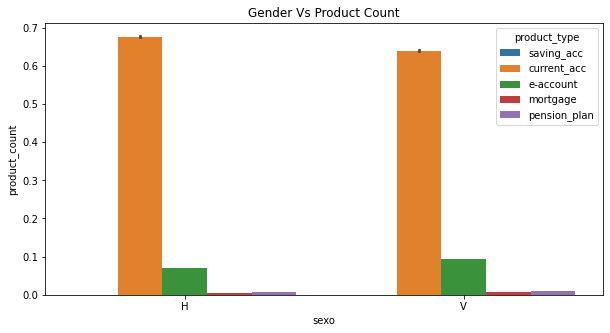

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'sexo', y = 'product_count',hue = 'product_type', data = df2)
plt.title('Gender Vs Product Count')

Text(0.5, 1.0, 'Income group Vs Product count')

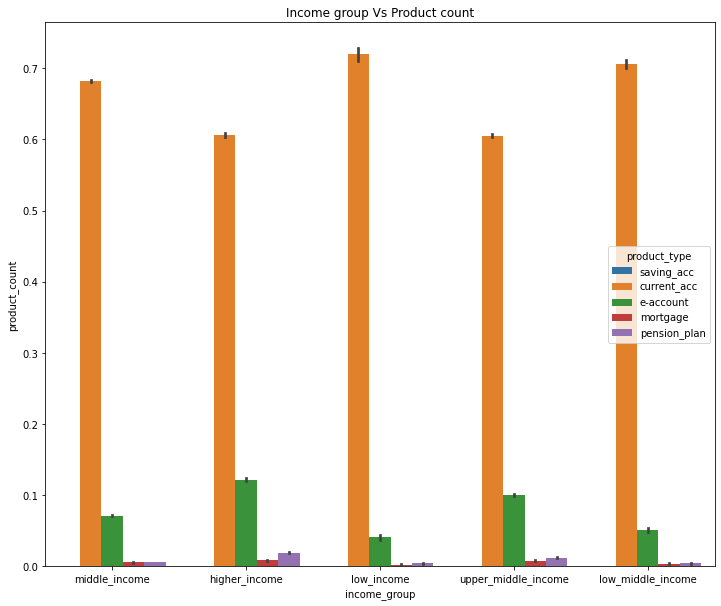

In [42]:
plt.figure(figsize=(12,10))
sns.barplot(x = 'income_group', y = 'product_count',hue = 'product_type', data = df2)
plt.title('Income group Vs Product count')

Text(0.5, 1.0, 'Societal Class Vs Product count')

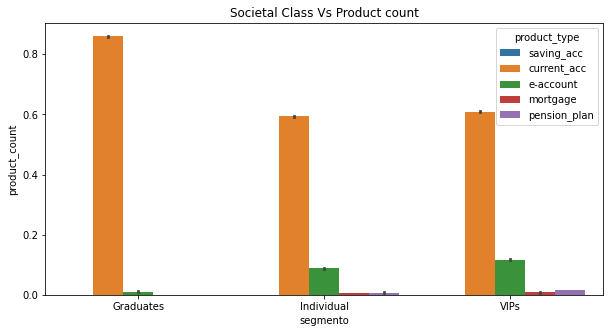

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'segmento', y = 'product_count',hue = 'product_type', data = df2)
plt.title('Societal Class Vs Product count')

In [43]:
small = df2.sample(frac = 0.05, random_state = 0)
small.shape

(187500, 10)

In [44]:
df2.shape

(3750000, 10)

In [45]:
#Chi square Test for independence
from scipy import stats

Chi square test to determine if Age is independent of the product type
Null Hypothesis: Age is independent from the type of product an individual will purchase
Alternative Hypothesis: Age determines the type of product an individual will purchase.
     Alpha = 0.05

In [46]:
contigency_table_age = pd.crosstab(small['Age_category'],small['product_type'])
contigency_table_age

product_type,current_acc,e-account,mortgage,pension_plan,saving_acc
Age_category,,,,,
20s,13719,13787,13799,13997,13971
30s,5482,5464,5383,5437,5506
40s,8234,8053,8234,8244,8188
50s,5006,4804,4879,4809,4796
60_and_above,5230,5247,5076,5154,5001


In [47]:
chisq_test = chi2_contingency(contigency_table_age)
chisq_test

(21.59327990042836,
 0.15681612292050232,
 16,
 array([[13917.776976  , 13801.02888   , 13806.940176  , 13906.693296  ,
         13840.560672  ],
        [ 5479.272064  ,  5433.30965333,  5435.636864  ,  5474.908544  ,
          5448.87287467],
        [ 8227.949136  ,  8158.92968   ,  8162.424336  ,  8221.396656  ,
          8182.300192  ],
        [ 4880.956128  ,  4840.01264   ,  4842.085728  ,  4877.069088  ,
          4853.876416  ],
        [ 5165.045696  ,  5121.71914667,  5123.912896  ,  5160.932416  ,
          5136.38984533]]))

 Base on our p-value, we fail to reject hypothesis. we therefore conclude that, we do not have enough evidence to infer that we affect the type of product an individual we purchase

Chi square test to determine if sex is independent of the product type
Null Hypothesis: sex is independent from the type of product an individual will purchase
Alternative Hypothesis: sex determines the type of product an individual will purchase.
     Alpha = 0.05

In [48]:
contigency_sex = pd.crosstab(df2['sexo'],df2['product_type'])
contigency_sex
    


product_type,current_acc,e-account,mortgage,pension_plan,saving_acc
sexo,,,,,
H,341511,341511,341511,341511,341511
V,408489,408489,408489,408489,408489


In [49]:
contigency_table_sex = pd.crosstab(small['sexo'],small['product_type'])
contigency_table_sex

product_type,current_acc,e-account,mortgage,pension_plan,saving_acc
sexo,,,,,
H,17047,17020,16933,17167,17013
V,20624,20335,20438,20474,20449


In [50]:
chisq_test = chi2_contingency(contigency_table_sex)
chisq_test

(1.4412792174245748,
 0.8369896940918944,
 4,
 array([[17113.68416   , 16970.12746667, 16977.39616   , 17100.05536   ,
         17018.73685333],
        [20557.31584   , 20384.87253333, 20393.60384   , 20540.94464   ,
         20443.26314667]]))

P-value is greater than 0.05, we therefore fail to reject the null hypothesis, and conclude that we do not have enough evidence to infer that product type dependence on sex of the individual

In [51]:
contigency_table_income = pd.crosstab(small['income_group'],small['product_type'])
contigency_table_income 

product_type,current_acc,e-account,mortgage,pension_plan,saving_acc
income_group,,,,,
higher_income,5118,5000,4990,5115,4958
low_income,564,466,529,531,544
low_middle_income,1233,1220,1207,1214,1231
middle_income,22622,22605,22550,22673,22543
upper_middle_income,8134,8064,8095,8108,8186


In [52]:
chisq_test = chi2_contingency(contigency_table_income)
chisq_test

(14.318615925113079,
 0.5749906812305668,
 16,
 array([[ 5059.165072  ,  5016.72669333,  5018.875472  ,  5055.136112  ,
          5031.09665067],
        [  529.202208  ,   524.76304   ,   524.987808  ,   528.780768  ,
           526.266176  ],
        [ 1226.56776   ,  1216.2788    ,  1216.79976   ,  1225.59096   ,
          1219.76272   ],
        [22701.649616  , 22511.21874667, 22520.860816  , 22683.570736  ,
         22575.70008533],
        [ 8154.415344  ,  8086.01272   ,  8089.476144  ,  8147.921424  ,
          8109.174368  ]]))

P-value is greater than 0.05, we therefore fail to reject the null hypothesis, and conclude that we do not have enough evidence to infer that product type dependence on household income of the individual

In [53]:
contigency_table_class = pd.crosstab(small['segmento'],small['product_type'])
contigency_table_class 

product_type,current_acc,e-account,mortgage,pension_plan,saving_acc
segmento,,,,,
Graduates,7739,8020,7898,7946,8012
Individual,15072,14721,14827,14905,14793
VIPs,14860,14614,14646,14790,14657


In [54]:
chisq_test = chi2_contingency(contigency_table_class)
chisq_test

(12.116034683667085,
 0.1461013071323677,
 8,
 array([[ 7959.12888   ,  7892.3644    ,  7895.74488   ,  7952.79048   ,
          7914.97136   ],
        [14931.378016  , 14806.12741333, 14812.469216  , 14919.487136  ,
         14848.53821867],
        [14780.493104  , 14656.50818667, 14662.785904  , 14768.722384  ,
         14698.49042133]]))

P-value is greater than 0.05, we therefore fail to reject the null hypothesis, and conclude that we do not have enough evidence to infer that product type dependence on the class  of the individual

In [56]:
#import logistic regression modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

creating dummy variables

In [57]:
dummy = pd.get_dummies(small, columns=['sexo','segmento',], drop_first=True)
dummy.head()

,ncodpers,income_group,age,renta,Age_category,nomprov,product_type,product_count,sexo_V,segmento_Individual,segmento_VIPs
1695594,1207246,upper_middle_income,26.0,169642.38,20s,ZARAGOZA,e-account,0,0,0,1
2270995,328293,upper_middle_income,54.0,139267.50,50s,MADRID,mortgage,0,1,0,1
3243586,1180217,middle_income,22.0,91108.56,20s,BADAJOZ,pension_plan,0,0,0,0
3176559,1407666,higher_income,21.0,772708.86,20s,GIRONA,pension_plan,0,1,0,1
3200274,934767,upper_middle_income,24.0,131314.89,20s,BARCELONA,pension_plan,0,0,0,1


splitting data into train and test data set

In [58]:
x = dummy[['age','sexo_V','renta','segmento_Individual','segmento_VIPs']]
y = dummy['product_type']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140625, 5)
(46875, 5)
(140625,)
(46875,)


In [61]:
#Building the model
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

C:\Users\cofos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cofos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\cofos\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\cofos\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [62]:
parameters = model1.get_params()
print(parameters)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [63]:
print('Intercept: \n', model1.intercept_)
print('Coefficients: \n', model1.coef_)

Intercept: 
 [-0.02190557 -0.01221599 -0.00483748  0.00951065  0.02944838]
Coefficients: 
 [[ 4.18748854e-04  1.71386627e-03 -1.48731321e-08  1.57759702e-02
   2.11255253e-02]
 [ 7.51465050e-04 -6.62638758e-03 -4.66190588e-08 -2.09976517e-02
  -1.63229785e-02]
 [-3.39504711e-05  5.78435911e-03  4.27904380e-08 -2.21084941e-03
  -8.46807125e-03]
 [-3.13109921e-04 -8.30305961e-03  1.59383219e-08  9.50663924e-03
   1.05511312e-02]
 [-8.23153511e-04  7.43122180e-03  2.78371532e-09 -2.07410828e-03
  -6.88560683e-03]]


In [64]:
confusion_matrix= metrics.confusion_matrix(y_test, preds)
confusion_matrix

array([[5352,  145,   67, 1218, 2538],
       [5294,  143,   58, 1242, 2666],
       [5309,  143,   63, 1213, 2571],
       [5296,  140,   69, 1284, 2662],
       [5360,  145,   63, 1277, 2557]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

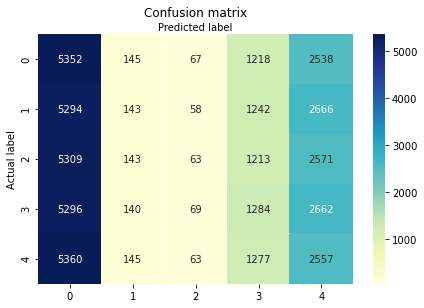

In [65]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
confmtrx = np.array(metrics.confusion_matrix(y_test, preds))
confmtrx

array([[5352,  145,   67, 1218, 2538],
       [5294,  143,   58, 1242, 2666],
       [5309,  143,   63, 1213, 2571],
       [5296,  140,   69, 1284, 2662],
       [5360,  145,   63, 1277, 2557]], dtype=int64)

In [67]:
pd.DataFrame(confmtrx, index=['pension_plan','current_acc', 'e_account','saving_acc','mortgage'],
columns=['predicted_pension_plan', 'predicted_current_acc','predicted_e_account','predicted_saving_acc', 'predicted_mortgage'])

,predicted_pension_plan,predicted_current_acc,predicted_e_account,predicted_saving_acc,predicted_mortgage
pension_plan,5352,145,67,1218,2538
current_acc,5294,143,58,1242,2666
e_account,5309,143,63,1213,2571
saving_acc,5296,140,69,1284,2662
mortgage,5360,145,63,1277,2557


In [68]:
classi_report=classification_report(y_test, preds)
print(classi_report)

              precision    recall  f1-score   support

 current_acc       0.20      0.57      0.30      9320
   e-account       0.20      0.02      0.03      9403
    mortgage       0.20      0.01      0.01      9299
pension_plan       0.21      0.14      0.16      9451
  saving_acc       0.20      0.27      0.23      9402

    accuracy                           0.20     46875
   macro avg       0.20      0.20      0.15     46875
weighted avg       0.20      0.20      0.15     46875

